In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier


df = pd.read_csv('student-mat.csv')
print(df.shape)
print(df.columns)

(395, 33)
Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')


In [150]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

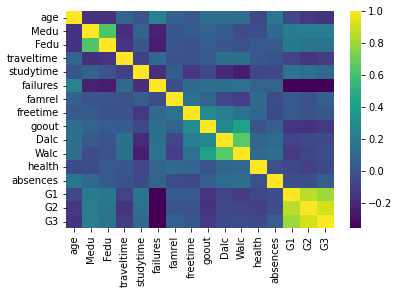

In [151]:
sns.heatmap(df.corr(), cmap='viridis')
plt.show()

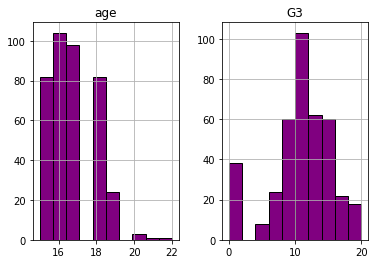

In [152]:
features = ['age', 'G3']

df.loc[:, features].hist(color='purple', edgecolor='black')
plt.show()


<AxesSubplot:xlabel='school', ylabel='G3'>

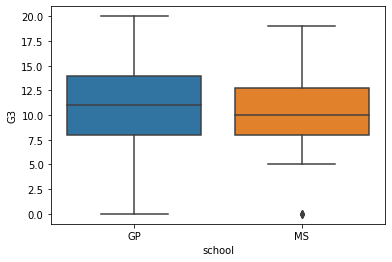

In [52]:
sns.boxplot(x='school',y='G3',data=df)

<AxesSubplot:xlabel='sex', ylabel='G3'>

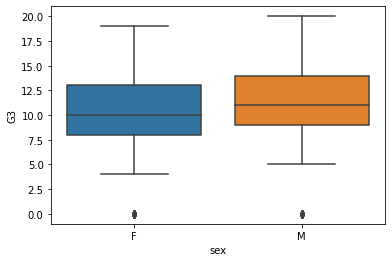

In [53]:
sns.boxplot(x='sex',y='G3',data=df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [154]:
df = df.drop(['famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian'], axis = 1)
df['address'] = LabelEncoder().fit_transform(df['address'])
df['schoolsup'] = LabelEncoder().fit_transform(df['schoolsup'])
df['famsup'] = LabelEncoder().fit_transform(df['famsup'])
df['paid'] = LabelEncoder().fit_transform(df['paid'])
df['activities'] = LabelEncoder().fit_transform(df['activities'])
df['nursery'] = LabelEncoder().fit_transform(df['nursery'])
df['higher'] = LabelEncoder().fit_transform(df['higher'])
df['internet'] = LabelEncoder().fit_transform(df['internet'])
df['romantic'] = LabelEncoder().fit_transform(df['romantic'])
df['sex'] = LabelEncoder().fit_transform(df['sex'])
df['school'] = LabelEncoder().fit_transform(df['school'])


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   Medu        395 non-null    int64
 5   Fedu        395 non-null    int64
 6   traveltime  395 non-null    int64
 7   studytime   395 non-null    int64
 8   failures    395 non-null    int64
 9   schoolsup   395 non-null    int32
 10  famsup      395 non-null    int32
 11  paid        395 non-null    int32
 12  activities  395 non-null    int32
 13  nursery     395 non-null    int32
 14  higher      395 non-null    int32
 15  internet    395 non-null    int32
 16  romantic    395 non-null    int32
 17  famrel      395 non-null    int64
 18  freetime    395 non-null    int64
 19  goout       395 non-null    int64
 20  Dalc        395 non-null    int6

In [156]:
X = df.drop(['sex'], axis = 1)
y = df['sex']

In [157]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train) 
scaled_X_test = scaler.transform(X_test)

In [158]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(scaled_X_train, y_train)
pred = knn.predict(scaled_X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[33 10]
 [15 21]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        43
           1       0.68      0.58      0.63        36

    accuracy                           0.68        79
   macro avg       0.68      0.68      0.68        79
weighted avg       0.68      0.68      0.68        79

0.6835443037974683


In [159]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train,y_train)
    pred_i = knn.predict(scaled_X_test)
    error_rate.append(np.mean(pred_i != y_test))

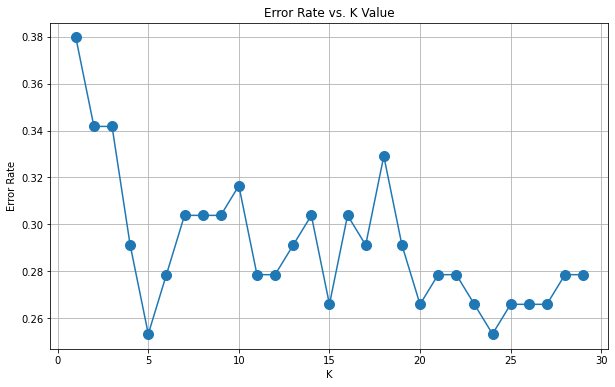

In [160]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()


In [162]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(scaled_X_train,y_train)
pred = knn.predict(scaled_X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[33 10]
 [10 26]]
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        43
           1       0.72      0.72      0.72        36

    accuracy                           0.75        79
   macro avg       0.74      0.74      0.74        79
weighted avg       0.75      0.75      0.75        79

0.7468354430379747


In [165]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(scaled_X_train, y_train)
pred = tree.predict(scaled_X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[27 16]
 [12 24]]
              precision    recall  f1-score   support

           0       0.69      0.63      0.66        43
           1       0.60      0.67      0.63        36

    accuracy                           0.65        79
   macro avg       0.65      0.65      0.65        79
weighted avg       0.65      0.65      0.65        79

0.6455696202531646


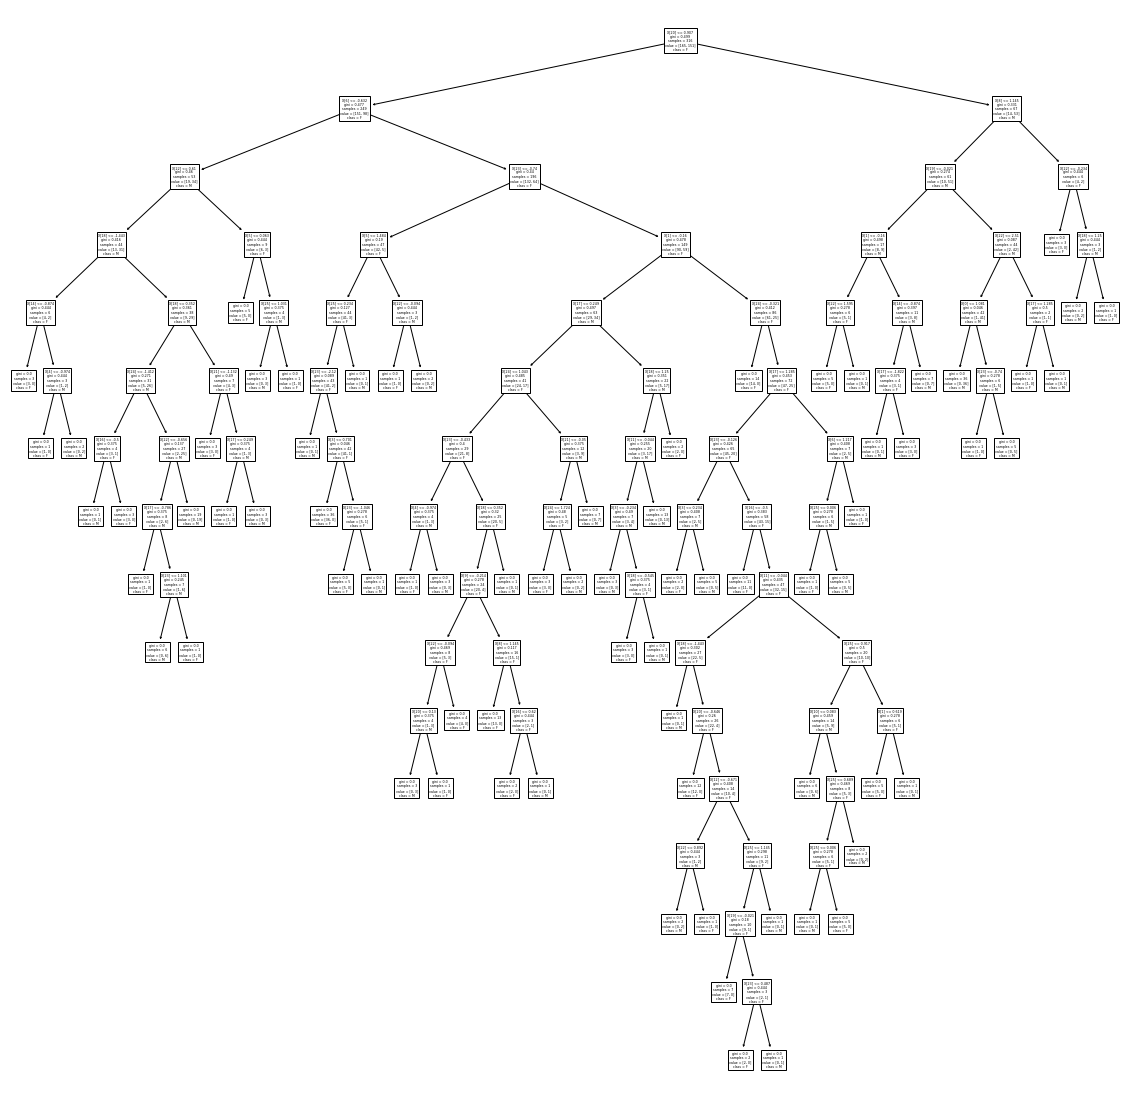

In [172]:
plt.figure(figsize = (20, 20))
plot_tree(tree, class_names = ['F', 'M'])
plt.show()

In [111]:
svm = SVC(C=10, gamma=0.0001)
svm.fit(scaled_X_train, y_train)
pred = svm.predict(scaled_X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print(accuracy_score(y_test,pred))

[[41  2]
 [27  9]]
              precision    recall  f1-score   support

           0       0.60      0.95      0.74        43
           1       0.82      0.25      0.38        36

    accuracy                           0.63        79
   macro avg       0.71      0.60      0.56        79
weighted avg       0.70      0.63      0.58        79

0.6329113924050633


In [112]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid, refit=True, verbose=3)
grid.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.516 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.516 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.516 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.524 total time=   0.0s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.578 total time=   0.0s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.714 total time=   0.0s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.587 total time=   0.0s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.619 total time=   0.0s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.547 total time=   0.0s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.619 total time=   0.0s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.540 total time=   0.0s
[CV 4/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.540 total time=   0.0s
[CV 5/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.651 total time=   0.0s
[CV 1/5] END ...C=1000, gamm

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [113]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [114]:
grid.best_estimator_

SVC(C=100, gamma=0.0001)

In [115]:
grid_pred = grid.predict(scaled_X_test)
print(confusion_matrix(y_test, grid_pred))
print(classification_report(y_test, grid_pred))
print(accuracy_score(y_test,grid_pred))

[[37  6]
 [15 21]]
              precision    recall  f1-score   support

           0       0.71      0.86      0.78        43
           1       0.78      0.58      0.67        36

    accuracy                           0.73        79
   macro avg       0.74      0.72      0.72        79
weighted avg       0.74      0.73      0.73        79

0.7341772151898734


In [125]:
randomForest = RandomForestClassifier(random_state=0)
randomForest.fit(scaled_X_train, y_train)
pred = randomForest.predict(scaled_X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test,pred))

[[34  9]
 [13 23]]
              precision    recall  f1-score   support

           0       0.72      0.79      0.76        43
           1       0.72      0.64      0.68        36

    accuracy                           0.72        79
   macro avg       0.72      0.71      0.72        79
weighted avg       0.72      0.72      0.72        79

0.7215189873417721


In [122]:
param_dist = {
 'criterion': ["entropy","gini"],
 'max_depth' : [2, 5, 10, 20, None],
 }

gridrf = GridSearchCV(RandomForestClassifier(), param_dist, n_jobs=-1)
gridrf.fit(scaled_X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 5, 10, 20, None]})

In [123]:
gridrf.best_params_

{'criterion': 'gini', 'max_depth': 5}

In [124]:
gridrf_pred = gridrf.predict(scaled_X_test)
print(confusion_matrix(y_test, gridrf_pred))
print(classification_report(y_test, gridrf_pred))
print(accuracy_score(y_test, gridrf_pred))

[[36  7]
 [16 20]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76        43
           1       0.74      0.56      0.63        36

    accuracy                           0.71        79
   macro avg       0.72      0.70      0.70        79
weighted avg       0.71      0.71      0.70        79

0.7088607594936709


In [126]:
adaBoost = AdaBoostClassifier(n_estimators=100, random_state=0)
adaBoost.fit(scaled_X_train, y_train)
pred = adaBoost.predict(scaled_X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
print(accuracy_score(y_test,pred))


[[33 10]
 [15 21]]
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        43
           1       0.68      0.58      0.63        36

    accuracy                           0.68        79
   macro avg       0.68      0.68      0.68        79
weighted avg       0.68      0.68      0.68        79

0.6835443037974683


In [127]:
param_dist = {
 'n_estimators': [100, 200, 300, 400],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 }
gridAB = GridSearchCV(AdaBoostClassifier(), param_dist, n_jobs=-1)
gridAB.fit(scaled_X_train, y_train)

GridSearchCV(estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.3, 1],
                         'n_estimators': [100, 200, 300, 400]})

In [128]:
gridAB.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [129]:
gridAB_pred = gridAB.predict(scaled_X_test)
print(confusion_matrix(y_test, gridAB_pred))
print(classification_report(y_test, gridAB_pred))
print(accuracy_score(y_test, gridAB_pred))


[[36  7]
 [15 21]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77        43
           1       0.75      0.58      0.66        36

    accuracy                           0.72        79
   macro avg       0.73      0.71      0.71        79
weighted avg       0.73      0.72      0.72        79

0.7215189873417721
